## Imports

In [ ]:
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [ ]:
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00


In [ ]:
!pip install torch-geometric -f https://data.pyg.org/whl/torch-2.2.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.2.0+cpu.html


## Ref (Karate club)

In [ ]:
from torch_geometric.datasets import KarateClub
from torch_geometric.transforms import NormalizeFeatures

dataset = KarateClub(transform=NormalizeFeatures())
data = dataset[0]
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(34, 16)
        self.conv2 = GCNConv(16, 4)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x


In [ ]:
model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
train_mask[:17] = True
test_mask = ~train_mask

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')


Epoch 0, Loss: 1.3768
Epoch 20, Loss: 0.7602
Epoch 40, Loss: 0.3193
Epoch 60, Loss: 0.1223
Epoch 80, Loss: 0.0552
Epoch 100, Loss: 0.0295
Epoch 120, Loss: 0.0178
Epoch 140, Loss: 0.0118
Epoch 160, Loss: 0.0085
Epoch 180, Loss: 0.0064


In [ ]:
model.eval()
_, pred = model(data.x, data.edge_index).max(dim=1)
correct = pred[test_mask] == data.y[test_mask]
acc = int(correct.sum()) / int(test_mask.sum())
print(f'Accuracy: {acc:.4f}')


Accuracy: 0.7059


## 0. Data Processing

In [ ]:
import pandas as pd

Fix time stamp

In [ ]:
import pandas as pd
import os
from glob import glob

input_dir = '/content/drive/MyDrisvs'

output_dir = '/content/drive/MyDtput_csvs/outpcleaned'
os.makedirs(output_dir, exist_ok=True)

csv_files = glob(os.path.join(input_dir, '*.csv'))

for file_path in csv_files:
    try:
        df = pd.read_csv(file_path)
        df['time_'] = pd.to_datetime(df['time_'], format='mixed', errors='coerce')
        df['time_'] = df['time_'].dt.strftime('%H:%M:%S.%f').str.rstrip('0').str.rstrip('.')
        filename = os.path.basename(file_path)
        output_path = os.path.join(output_dir, filename)
        df.to_csv(output_path, index=False)

        print(f"✅ Processed: {filename}")
    except Exception as e:
        print(f"❌ Error in {file_path}: {e}")


✅ Processed: 38 2017-03-23 matrix2_res.csv
✅ Processed: 40 2017-03-25 matrix2_res.csv
✅ Processed: 18 2017-03-03 matrix2_res.csv
✅ Processed: 50 2017-04-04 matrix2_res.csv
✅ Processed: 24 2017-03-09 matrix2_res.csv
✅ Processed: 51 2017-04-05 matrix2_res.csv
✅ Processed: 31 2017-03-16 matrix2_res.csv
✅ Processed: 33 2017-03-18 matrix2_res.csv
✅ Processed: 44 NA matrix2_res.csv
✅ Processed: 36 2017-03-21 matrix2_res.csv
✅ Processed: 26 2017-03-11 matrix2_res.csv
✅ Processed: 21 2017-03-06 matrix2_res.csv
✅ Processed: 28 2017-03-13 matrix2_res.csv
✅ Processed: 34 2017-03-19 matrix2_res.csv
✅ Processed: 47 2017-04-01 matrix2_res.csv
✅ Processed: 29 2017-03-14 matrix2_res.csv
✅ Processed: 48 2017-04-02 matrix2_res.csv
✅ Processed: 45 2017-03-30 matrix2_res.csv
✅ Processed: 20 2017-03-05 matrix2_res.csv
✅ Processed: 54 2017-04-08 matrix2_res.csv
✅ Processed: 22 2017-03-07 matrix2_res.csv
✅ Processed: 43 2017-03-28 matrix2_res.csv
✅ Processed: 37 2017-03-22 matrix2_res.csv
✅ Processed: 17 201

In [ ]:
import os
from glob import glob

folder_path = '/content/drive/MyDrive/output_csvs/output_csvs_cleaned'

csv_files = glob(os.path.join(folder_path, '*.csv'))
print(f"Total CSV files found: {len(csv_files)}")


Total CSV files found: 40


generate summary

In [ ]:
summary = []

for file in csv_files:
    try:
        df = pd.read_csv(file)

        # Clean date and time
        df['date'] = df['date'].astype(str).str.strip()
        df['time_'] = pd.to_datetime(df['time_'], format='mixed', errors='coerce')

        # Group by date
        grouped = df.groupby('date')
        dates = sorted(grouped.groups.keys())

        if len(dates) >= 2:
            date1, date2 = dates[0], dates[1]

            time1 = df[df['date'] == date1]['time_']
            time2 = df[df['date'] == date2]['time_']

            summary.append({
                'File Name': os.path.basename(file),
                'Date 1': date1,
                'Date 1 Min Time': time1.min().strftime('%H:%M:%S.%f')[:-3],
                'Date 1 Max Time': time1.max().strftime('%H:%M:%S.%f')[:-3],
                'Date 2': date2,
                'Date 2 Min Time': time2.min().strftime('%H:%M:%S.%f')[:-3],
                'Date 2 Max Time': time2.max().strftime('%H:%M:%S.%f')[:-3],
                'Status': 'Both dates present'
            })

        elif len(dates) == 1:
            date1 = dates[0]
            time1 = df[df['date'] == date1]['time_']

            summary.append({
                'File Name': os.path.basename(file),
                'Date 1': date1,
                'Date 1 Min Time': time1.min().strftime('%H:%M:%S.%f')[:-3],
                'Date 1 Max Time': time1.max().strftime('%H:%M:%S.%f')[:-3],
                'Date 2': 'NA',
                'Date 2 Min Time': 'NA',
                'Date 2 Max Time': 'NA',
                'Status': 'Only Date 1 present'
            })
        else:
            summary.append({
                'File Name': os.path.basename(file),
                'Date 1': 'NA',
                'Date 1 Min Time': 'NA',
                'Date 1 Max Time': 'NA',
                'Date 2': 'NA',
                'Date 2 Min Time': 'NA',
                'Date 2 Max Time': 'NA',
                'Status': 'No dates found'
            })

    except Exception as e:
        summary.append({
            'File Name': os.path.basename(file),
            'Date 1': 'NA',
            'Date 1 Min Time': 'NA',
            'Date 1 Max Time': 'NA',
            'Date 2': 'NA',
            'Date 2 Min Time': 'NA',
            'Date 2 Max Time': 'NA',
            'Status': f'Error: {e}'
        })

# Convert to DataFrame and save
summary_df = pd.DataFrame(summary)
summary_path = '/content/drive/MyDrive/output_csvs/output_csvs_cleaned/summary_with_status.csv'
summary_df.to_csv(summary_path, index=False)

print(f" Enhanced summary saved to: {summary_path}")


✅ Enhanced summary saved to: /content/drive/MyDrive/output_csvs/output_csvs_cleaned/summary_with_status.csv


In [ ]:
summary_df

,File Name,Date 1,Date 1 Min Time,Date 1 Max Time,Date 2,Date 2 Min Time,Date 2 Max Time,Status
0,14 2017-02-27 matrix2_res.csv,2017-02-27,03:03:01.500,19:22:14.000,NA,NA,NA,Only Date 1 present
1,16 2017-03-01 matrix2_res.csv,2017-03-01,12:24:00.500,23:59:59.250,2017-03-02,00:00:00.500,07:31:08.250,Both dates present
2,17 2017-03-02 matrix2_res.csv,2017-03-02,03:03:35.250,23:59:59.500,2017-03-03,00:00:00.250,01:09:19.250,Both dates present
3,18 2017-03-03 matrix2_res.csv,2017-03-03,14:38:46.000,23:59:58.500,2017-03-04,00:00:00.250,05:07:28.750,Both dates present
4,19 2017-03-04 matrix2_res.csv,2017-03-04,03:02:12.750,23:59:59.750,2017-03-05,00:00:00.500,09:21:00.500,Both dates present
5,20 2017-03-05 matrix2_res.csv,2017-03-05,03:01:58.250,23:59:58.250,2017-03-06,00:00:00.750,05:08:19.750,Both dates present
6,21 2017-03-06 matrix2_res.csv,2017-03-06,03:06:39.500,23:59:59.750,2017-03-07,00:00:00.250,05:01:20.250,Both dates present
7,22 2017-03-07 matrix2_res.csv,2017-03-07,03:05:28.500,23:59:59.250,2017-03-08,00:00:02.500,06:51:45.750,Both dates present
8,23 2017-03-08 matrix2_res.csv,2017-03-08,03:02:42.250,23:59:59.250,2017-03-09,00:00:00.500,06:38:37.250,Both dates present
9,24 2017-03-09 matrix2_res.csv,2017-03-09,03:12:16.250,23:59:57.750,2017-03-10,00:00:00.000,05:00:57.500,Both dates present


Split by date

In [ ]:
import os
import pandas as pd
from glob import glob

input_folder = '/content/drive/MyDrive/output_csvs/output_csvs_cleaned'
output_folder = '/content/drive/MyDrive/output_csvs/split_by_date'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get all cleaned CSV files
csv_files = glob(os.path.join(input_folder, '*.csv'))

# Track how many files we generate per date
file_count = {}

# Process each file
for file_path in csv_files:
    df = pd.read_csv(file_path)

    if 'date' not in df.columns:
        print(f"⚠️ Skipping {file_path} — no 'date' column found.")
        continue

    # Ensure time_ is datetime type
    df['time_'] = pd.to_datetime(df['time_'], errors='coerce')
    df.dropna(subset=['time_'], inplace=True)

    # Group by date
    for unique_date in df['date'].unique():
        daily_df = df[df['date'] == unique_date].copy()

        # Optional: sort by time
        daily_df = daily_df.sort_values(by='time_')

        # Output file path
        output_file = os.path.join(output_folder, f'{unique_date}.csv')

        # If file exists, append to it
        if os.path.exists(output_file):
            daily_df.to_csv(output_file, mode='a', header=False, index=False)
        else:
            daily_df.to_csv(output_file, index=False)

        # Track count
        file_count[unique_date] = file_count.get(unique_date, 0) + 1

print("✅ Splitting complete!")
print(f"🗂️ Generated {len(file_count)} date-wise CSV files in:\n{output_folder}")


/tmp/ipython-input-111-3973462004.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_'] = pd.to_datetime(df['time_'], errors='coerce')
/tmp/ipython-input-111-3973462004.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_'] = pd.to_datetime(df['time_'], errors='coerce')
/tmp/ipython-input-111-3973462004.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_'] = pd.to_datetime(df['time_'], errors='coerce')
/tmp/ipython-input-111-3973462004.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `da

⚠️ Skipping /content/drive/MyDrive/output_csvs/output_csvs_cleaned/summary_with_status.csv — no 'date' column found.
✅ Splitting complete!
🗂️ Generated 41 date-wise CSV files in:
/content/drive/MyDrive/output_csvs/split_by_date


In [ ]:
# Total rows before
total_before = 0
for f in csv_files:
    df = pd.read_csv(f)
    total_before += len(df)

# Total rows after
output_files = glob(os.path.join(output_folder, '*.csv'))
total_after = 0
for f in output_files:
    df = pd.read_csv(f)
    total_after += len(df)

print(f"Total rows before: {total_before}")
print(f"Total rows after:  {total_after}")


Total rows before: 8398568
Total rows after:  8398527


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/output_csvs/split_by_date/2017-02-27.csv')

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,time,time_,date
0,CA0000001504,CA0000001628,122,P3:EE:H3:A8,1488200506,1488200512,1488200675,1488200633,1.488201e+09,03:03:01.5,2017-02-27
1,CA0000001529,CA0000001577,55,P3:EE:H3:A7,1488200730,1488200718,1488200857,1488200784,1.488201e+09,03:06:12.25,2017-02-27
2,CA0000001577,CA0000001529,55,P3:EE:H3:A7,1488200803,1488200730,1488200999,1488200857,1.488201e+09,03:07:27.25,2017-02-27
3,CA0000001723,CA0000001786,3,P3:EE:H3:A5,1488200718,1488200619,1488201358,1488200720,1.488201e+09,03:07:33.75,2017-02-27
4,CA0000001786,CA0000001577,91,P3:EE:H3:A7,1488200909,1488200803,1488201078,1488200999,1.488201e+09,03:09:07.25,2017-02-27
...,...,...,...,...,...,...,...,...,...,...,...
37404,CA0000001516,CA0000001819,33,P3:EE:H3:A1,1488259298,1488259151,1488259367,1488259330,1.488259e+09,19:21:26.5,2017-02-27
37405,CA0000001351,CA0000001819,27,P3:EE:H3:A1,1488259304,1488259151,1488259367,1488259330,1.488259e+09,19:21:28,2017-02-27
37406,CA0000001516,CA0000001677,28,P3:EE:H3:A1,1488259298,1488259233,1488259367,1488259325,1.488259e+09,19:21:45.75,2017-02-27
37407,CA0000001351,CA0000001677,22,P3:EE:H3:A1,1488259304,1488259233,1488259367,1488259325,1.488259e+09,19:21:47.25,2017-02-27


check or revalidate

In [ ]:
import pandas as pd
import os
from glob import glob

folder = '/content/drive/MyDrive/output_csvs/split_by_date'
csv_files = glob(os.path.join(folder, '*.csv'))

for f in csv_files:
    try:
        df = pd.read_csv(f)

        if 'time_' in df.columns:
            df['time_'] = pd.to_datetime(df['time_'], errors='coerce').dt.strftime('%H:%M:%S.%f').str.rstrip('0').str.rstrip('.')

            df = df.dropna(subset=['time_'])

        df.to_csv(f, index=False)
        print(f"✅ Cleaned: {os.path.basename(f)}")
    except Exception as e:
        print(f"❌ Error processing {os.path.basename(f)}: {e}")


✅ Cleaned: 2017-03-23.csv
✅ Cleaned: 2017-03-24.csv
✅ Cleaned: 2017-03-25.csv
✅ Cleaned: 2017-03-26.csv
✅ Cleaned: 2017-03-03.csv
✅ Cleaned: 2017-03-04.csv
✅ Cleaned: 2017-04-04.csv
✅ Cleaned: 2017-04-05.csv
✅ Cleaned: 2017-03-09.csv
✅ Cleaned: 2017-03-10.csv
✅ Cleaned: 2017-04-06.csv
✅ Cleaned: 2017-03-16.csv
✅ Cleaned: 2017-03-17.csv
✅ Cleaned: 2017-03-18.csv
✅ Cleaned: 2017-03-19.csv
✅ Cleaned: 2017-03-29.csv
✅ Cleaned: 2017-03-30.csv
✅ Cleaned: 2017-03-21.csv
✅ Cleaned: 2017-03-22.csv
✅ Cleaned: 2017-03-11.csv
✅ Cleaned: 2017-03-12.csv
✅ Cleaned: 2017-03-06.csv
✅ Cleaned: 2017-03-07.csv
✅ Cleaned: 2017-03-13.csv
✅ Cleaned: 2017-03-20.csv
✅ Cleaned: 2017-04-01.csv
✅ Cleaned: 2017-04-02.csv
✅ Cleaned: 2017-03-14.csv
✅ Cleaned: 2017-03-15.csv
✅ Cleaned: 2017-04-03.csv
✅ Cleaned: 2017-03-31.csv
✅ Cleaned: 2017-03-05.csv
✅ Cleaned: 2017-04-08.csv
✅ Cleaned: 2017-04-09.csv
✅ Cleaned: 2017-03-08.csv
✅ Cleaned: 2017-03-28.csv
✅ Cleaned: 2017-03-02.csv
✅ Cleaned: 2017-02-27.csv
✅ Cleaned: 2

## ref - create graph

In [ ]:
src = [hen_id_map[v1] for v1 in df['V1']]
dst = [hen_id_map[v2] for v2 in df['V2']]
edge_index = torch.tensor([src, dst], dtype=torch.long)

In [ ]:
edge_index = torch.tensor([src, dst], dtype=torch.long)

edge_index = torch.cat([edge_index, edge_index[[1, 0]]], dim=1)

dur = torch.tensor(df['V3'].values, dtype=torch.float).unsqueeze(1)


In [ ]:
antenna_encoder = LabelEncoder()
antenna_ids = antenna_encoder.fit_transform(df['V4'])
antenna_onehot = F.one_hot(torch.tensor(antenna_ids), num_classes=26).float()

In [ ]:
overlap = df[['V7', 'V8']].min(axis=1) - df[['V5', 'V6']].max(axis=1)
overlap = overlap.clip(lower=0)
overlap = torch.tensor(overlap.values, dtype=torch.float).unsqueeze(1)
entry_diff = torch.tensor(abs(df['V5'] - df['V6']), dtype=torch.float).unsqueeze(1)

edge_attr = torch.cat([dur, antenna_onehot, overlap, entry_diff], dim=1)


edge_attr = torch.cat([edge_attr, edge_attr], dim=0)



In [ ]:
entry_diff = torch.tensor(abs(df['V5'] - df['V6']), dtype=torch.float).unsqueeze(1)

edge_attr = torch.cat([dur, antenna_onehot, overlap, entry_diff], dim=1)


edge_attr = torch.cat([edge_attr, edge_attr], dim=0)



In [ ]:
x = torch.ones((len(hens), 1))


graph_data = Data(
    x=x,
    edge_index=edge_index,
    edge_attr=edge_attr
)
graph_data.date = pd.to_datetime(df['date'].iloc[0])

print(graph_data)

Data(x=[542, 1], edge_index=[2, 74818], edge_attr=[74818, 29], date=2017-02-27 00:00:00)


In [ ]:
import pandas as pd
import torch
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
from torch_geometric.data import Data

df = pd.read_csv('/content/drive/MyDrive/output_csvs/split_by_date/2017-02-27.csv')
un_hen = pd.unique(df[['V1', 'V2']].values.ravel())
hen_id_map = {hen: idx for idx, hen in enumerate(un_hen)}
num_nodes = len(un_hen)
src = [hen_id_map[v1] for v1 in df['V1']]
dst = [hen_id_map[v2] for v2 in df['V2']]
edge_index = torch.tensor([src, dst], dtype=torch.long)
edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)
dur = torch.tensor(df['V3'].values, dtype=torch.float).unsqueeze(1)
antenna_encoder = LabelEncoder()
antenna_ids = antenna_encoder.fit_transform(df['V4'])
antenna_onehot = F.one_hot(torch.tensor(antenna_ids), num_classes=26).float()
overlap = df[['V7', 'V8']].min(axis=1) - df[['V5', 'V6']].max(axis=1)
overlap = overlap.clip(lower=0)
overlap = torch.tensor(overlap.values, dtype=torch.float).unsqueeze(1)
entry_diff = torch.tensor(abs(df['V5'] - df['V6']), dtype=torch.float).unsqueeze(1)
edge_attr = torch.cat([dur, antenna_onehot, overlap, entry_diff], dim=1)
edge_attr = torch.cat([edge_attr, edge_attr], dim=0)
x = torch.ones((num_nodes, 1))
y = None

data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)

print(data)


Data(x=[542, 1], edge_index=[2, 74818], edge_attr=[74818, 29])


In [ ]:
len(df['V1'].unique())

571

In [ ]:
len(df['V2'].unique())

570

In [ ]:
len(df)

229367

In [ ]:
len(pd.unique(df[['V1', 'V2']].values.ravel()))

571

In [ ]:
len(df['V4'].unique())

26

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/output_csvs/split_by_date/2017-03-27.csv')

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,time,time_,date
0,CA0000002439,CA0000000318,214,P3:EI:H4:Inner_Pophole,1490610421,1490605010,1490610991,1490610634,1.490609e+09,00:07:44,2017-03-27


In [ ]:
un_hen = pd.unique(df[['V1','V2']].values.ravel())

In [ ]:
un_hen

array(['CA0000001504', 'CA0000001628', 'CA0000001529', 'CA0000001577',
       'CA0000001723', 'CA0000001786', 'CA0000001808', 'CA0000001523',
       'CA0000001875', 'CA0000001354', 'CA0000001864', 'CA0000001533',
       'CA0000001726', 'CA0000001579', 'CA0000001540', 'CA0000001582',
       'CA0000001300', 'CA0000001359', 'CA0000001360', 'CA0000001321',
       'CA0000001594', 'CA0000001767', 'CA0000001806', 'CA0000001825',
       'CA0000001664', 'CA0000001776', 'CA0000001823', 'CA0000001652',
       'CA0000001762', 'CA0000001316', 'CA0000001441', 'CA0000001387',
       'CA0000001758', 'CA0000001736', 'CA0000001341', 'CA0000001869',
       'CA0000001801', 'CA0000001417', 'CA0000001644', 'CA0000001402',
       'CA0000001770', 'CA0000001788', 'CA0000001539', 'CA0000001601',
       'CA0000001655', 'CA0000001410', 'CA0000001473', 'CA0000001702',
       'CA0000000630', 'CA0000001705', 'CA0000001333', 'CA0000001532',
       'CA0000001268', 'CA0000001841', 'CA0000001797', 'CA0000001727',
      

In [ ]:
hen_id = {hen: i for i, hen in enumerate(un_hen)}

In [ ]:
hen_id

{'CA0000001504': 0,
 'CA0000001628': 1,
 'CA0000001529': 2,
 'CA0000001577': 3,
 'CA0000001723': 4,
 'CA0000001786': 5,
 'CA0000001808': 6,
 'CA0000001523': 7,
 'CA0000001875': 8,
 'CA0000001354': 9,
 'CA0000001864': 10,
 'CA0000001533': 11,
 'CA0000001726': 12,
 'CA0000001579': 13,
 'CA0000001540': 14,
 'CA0000001582': 15,
 'CA0000001300': 16,
 'CA0000001359': 17,
 'CA0000001360': 18,
 'CA0000001321': 19,
 'CA0000001594': 20,
 'CA0000001767': 21,
 'CA0000001806': 22,
 'CA0000001825': 23,
 'CA0000001664': 24,
 'CA0000001776': 25,
 'CA0000001823': 26,
 'CA0000001652': 27,
 'CA0000001762': 28,
 'CA0000001316': 29,
 'CA0000001441': 30,
 'CA0000001387': 31,
 'CA0000001758': 32,
 'CA0000001736': 33,
 'CA0000001341': 34,
 'CA0000001869': 35,
 'CA0000001801': 36,
 'CA0000001417': 37,
 'CA0000001644': 38,
 'CA0000001402': 39,
 'CA0000001770': 40,
 'CA0000001788': 41,
 'CA0000001539': 42,
 'CA0000001601': 43,
 'CA0000001655': 44,
 'CA0000001410': 45,
 'CA0000001473': 46,
 'CA0000001702': 47,
 '

In [ ]:
src = [hen_id[v1] for v1 in df['V1']]
dst = [hen_id[v2] for v2 in df['V2']]

In [ ]:
d = {}
for i in range(len(src)):
  d[src[i]] = d.get(src[i], 0)+1


In [ ]:
i = 0
for i in d.values():
  if d[i] > 1:
    i +=1
i

9

In [ ]:
a = 0
for i in range(len(src)):
  print(src[i],"->",dst[i])
  a+=1
a

Streaming output truncated to the last 5000 lines.
299 -> 198
516 -> 161
482 -> 103
515 -> 526
354 -> 299
137 -> 190
133 -> 22
370 -> 349
445 -> 81
366 -> 211
131 -> 407
482 -> 348
111 -> 362
214 -> 528
309 -> 465
466 -> 249
163 -> 115
242 -> 435
342 -> 124
296 -> 13
397 -> 173
236 -> 265
227 -> 259
423 -> 276
151 -> 392
340 -> 318
368 -> 77
296 -> 237
172 -> 10
296 -> 39
247 -> 534
150 -> 316
516 -> 510
31 -> 99
153 -> 394
438 -> 208
410 -> 121
78 -> 18
373 -> 356
258 -> 534
156 -> 493
74 -> 86
249 -> 529
479 -> 394
533 -> 73
426 -> 259
78 -> 46
70 -> 262
381 -> 344
358 -> 172
200 -> 30
302 -> 200
402 -> 173
268 -> 536
445 -> 119
516 -> 124
435 -> 222
324 -> 140
441 -> 142
152 -> 3
149 -> 217
100 -> 148
74 -> 220
319 -> 380
4 -> 208
72 -> 142
227 -> 211
423 -> 256
515 -> 493
254 -> 442
370 -> 172
174 -> 355
462 -> 116
392 -> 245
354 -> 174
462 -> 216
268 -> 51
10 -> 404
337 -> 437
111 -> 217
370 -> 239
32 -> 252
310 -> 326
372 -> 344
317 -> 380
163 -> 14
18 -> 427
187 -> 9
181 -> 412


37409

In [ ]:
edge_index = torch.tensor([src, dst], dtype=torch.long)

In [ ]:
edge_index

tensor([[  0,   2,   3,  ..., 407, 205, 407],
        [  1,   3,   2,  ..., 442, 442, 205]])

In [ ]:
edge_index = torch.cat([edge_index, edge_index[[1, 0]]], dim=1)

dur = torch.tensor(df['V3'].values, dtype=torch.float).unsqueeze(1)

In [ ]:
dur

tensor([[122.],
        [ 55.],
        [ 55.],
        ...,
        [ 28.],
        [ 22.],
        [ 64.]])

In [ ]:
antenna_encoder = LabelEncoder()
antenna_ids = antenna_encoder.fit_transform(df['V4'])
antenna_onehot = F.one_hot(torch.tensor(antenna_ids), num_classes=26).float()

In [ ]:
overlap = df[['V7', 'V8']].min(axis=1) - df[['V5', 'V6']].max(axis=1)
overlap = overlap.clip(lower=0)
overlap = torch.tensor(overlap.values, dtype=torch.float).unsqueeze(1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
import pandas as pd
import torch
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
from torch_geometric.data import Data

In [ ]:
hens = pd.unique(df[['V1', 'V2']].values.ravel())
hen_id_map = {hen: i for i, hen in enumerate(hens)}

## 1. Create Graph

In [ ]:
import os
import pandas as pd
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder
from glob import glob
import numpy as np

input_dir = '/content/drive/MyDrive/output_csvs/split_by_date'
csv_files = sorted(glob(os.path.join(input_dir, '*.csv')))

graphs = []

for file_path in csv_files:
    df = pd.read_csv(file_path)
    if df.empty or df.shape[0] < 1:
        continue
    un_hen = pd.unique(df[['V1', 'V2']].values.ravel())
    hen_id_map = {hen: idx for idx, hen in enumerate(un_hen)}
    num_nodes = len(un_hen)
    src = [hen_id_map[v1] for v1 in df['V1']]
    dst = [hen_id_map[v2] for v2 in df['V2']]
    edge_index = torch.tensor([src, dst], dtype=torch.long)
    edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)
    dur = torch.tensor(df['V3'].values, dtype=torch.float).unsqueeze(1)
    antenna_ids = LabelEncoder().fit_transform(df['V4'])
    antenna_onehot = F.one_hot(torch.tensor(antenna_ids), num_classes=26).float()
    overlap = df[['V7', 'V8']].min(axis=1) - df[['V5', 'V6']].max(axis=1)
    overlap = overlap.clip(lower=0)
    overlap = torch.tensor(overlap.values, dtype=torch.float).unsqueeze(1)
    entry_diff = torch.tensor(abs(df['V5'] - df['V6']), dtype=torch.float).unsqueeze(1)

    edge_attr = torch.cat([dur, antenna_onehot, overlap, entry_diff], dim=1)
    edge_attr = torch.cat([edge_attr, edge_attr], dim=0)
    node_durations = {hen: [] for hen in un_hen}
    node_degrees = {hen: 0 for hen in un_hen}

    for _, row in df.iterrows():
        v1, v2, dur_val = row['V1'], row['V2'], row['V3']
        node_durations[v1].append(dur_val)
        node_durations[v2].append(dur_val)
        node_degrees[v1] += 1
        node_degrees[v2] += 1

    node_features = []
    for hen in un_hen:
        avg_dur = np.mean(node_durations[hen]) if node_durations[hen] else 0.0
        degree = node_degrees[hen]
        node_features.append([avg_dur, degree])

    x = torch.tensor(node_features, dtype=torch.float)

    graph_date = pd.to_datetime(df['date'].iloc[0]).date()

    data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)
    data.date = graph_date
    data.file_name = os.path.basename(file_path)

    graphs.append(data)

print(f"✅ Total graphs created: {len(graphs)}")


✅ Total graphs created: 41


In [ ]:
graphs

[Data(x=[542, 2], edge_index=[2, 74818], edge_attr=[74818, 29], date=2017-02-27, file_name='2017-02-27.csv'),
 Data(x=[553, 2], edge_index=[2, 194000], edge_attr=[194000, 29], date=2017-03-01, file_name='2017-03-01.csv'),
 Data(x=[574, 2], edge_index=[2, 363772], edge_attr=[363772, 29], date=2017-03-02, file_name='2017-03-02.csv'),
 Data(x=[562, 2], edge_index=[2, 199852], edge_attr=[199852, 29], date=2017-03-03, file_name='2017-03-03.csv'),
 Data(x=[567, 2], edge_index=[2, 433904], edge_attr=[433904, 29], date=2017-03-04, file_name='2017-03-04.csv'),
 Data(x=[562, 2], edge_index=[2, 420754], edge_attr=[420754, 29], date=2017-03-05, file_name='2017-03-05.csv'),
 Data(x=[570, 2], edge_index=[2, 397334], edge_attr=[397334, 29], date=2017-03-06, file_name='2017-03-06.csv'),
 Data(x=[613, 2], edge_index=[2, 389632], edge_attr=[389632, 29], date=2017-03-07, file_name='2017-03-07.csv'),
 Data(x=[625, 2], edge_index=[2, 360410], edge_attr=[360410, 29], date=2017-03-08, file_name='2017-03-08.c

In [ ]:
import pickle
with open("graph_list.pkl", "wb") as f:
    pickle.dump(graphs, f)


In [ ]:
import zipfile
with zipfile.ZipFile("graph_list_forecasting.zip", "w", zipfile.ZIP_DEFLATED) as zipf:
    zipf.write("graph_list.pkl")
from google.colab import files
files.download("graph_list_forecasting.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Production data

In [ ]:
import pandas as pd
import torch


prod_df = pd.read_csv("/content/drive/MyDrive/output_csvs/production.csv", on_bad_lines='skip', sep=";", skipinitialspace=True)




In [ ]:
graphs

[Data(x=[542, 2], edge_index=[2, 74818], edge_attr=[74818, 29], date=2017-02-27, file_name='2017-02-27.csv'),
 Data(x=[553, 2], edge_index=[2, 194000], edge_attr=[194000, 29], date=2017-03-01, file_name='2017-03-01.csv'),
 Data(x=[574, 2], edge_index=[2, 363772], edge_attr=[363772, 29], date=2017-03-02, file_name='2017-03-02.csv'),
 Data(x=[562, 2], edge_index=[2, 199852], edge_attr=[199852, 29], date=2017-03-03, file_name='2017-03-03.csv'),
 Data(x=[567, 2], edge_index=[2, 433904], edge_attr=[433904, 29], date=2017-03-04, file_name='2017-03-04.csv'),
 Data(x=[562, 2], edge_index=[2, 420754], edge_attr=[420754, 29], date=2017-03-05, file_name='2017-03-05.csv'),
 Data(x=[570, 2], edge_index=[2, 397334], edge_attr=[397334, 29], date=2017-03-06, file_name='2017-03-06.csv'),
 Data(x=[613, 2], edge_index=[2, 389632], edge_attr=[389632, 29], date=2017-03-07, file_name='2017-03-07.csv'),
 Data(x=[625, 2], edge_index=[2, 360410], edge_attr=[360410, 29], date=2017-03-08, file_name='2017-03-08.c

Based on target variable attaching both datas
- Date - Taget variable - Primary key

In [ ]:
import pandas as pd
import torch

# Ensure proper date and numeric format
prod_df['date'] = pd.to_datetime(prod_df['date'], errors='coerce')
prod_df['Laying.rate....'] = (
    prod_df['Laying.rate....']
    .astype(str)
    .str.replace(",", ".")
    .astype(float)
)

# Attach target variable
for g in graphs:
    date = g.date
    matching_row = prod_df[prod_df['date'] == pd.Timestamp(date)]

    if not matching_row.empty:
        laying_rate = matching_row['Laying.rate....'].iloc[0]
        g.y = torch.tensor([laying_rate], dtype=torch.float32)
    else:
        print(f"⚠️ No match found for date: {date} → skipping")

# Check sample
print(graphs[0].y)


⚠️ No match found for date: 2017-04-05 → skipping
⚠️ No match found for date: 2017-04-06 → skipping
⚠️ No match found for date: 2017-04-07 → skipping
⚠️ No match found for date: 2017-04-08 → skipping
⚠️ No match found for date: 2017-04-09 → skipping
tensor([94.9603])


In [ ]:
graphs = [g for g in graphs if hasattr(g, 'y') and g.y is not None]


In [ ]:
graphs

[Data(x=[542, 2], edge_index=[2, 74818], edge_attr=[74818, 29], date=2017-02-27, file_name='2017-02-27.csv', y=[1]),
 Data(x=[553, 2], edge_index=[2, 194000], edge_attr=[194000, 29], date=2017-03-01, file_name='2017-03-01.csv', y=[1]),
 Data(x=[574, 2], edge_index=[2, 363772], edge_attr=[363772, 29], date=2017-03-02, file_name='2017-03-02.csv', y=[1]),
 Data(x=[562, 2], edge_index=[2, 199852], edge_attr=[199852, 29], date=2017-03-03, file_name='2017-03-03.csv', y=[1]),
 Data(x=[567, 2], edge_index=[2, 433904], edge_attr=[433904, 29], date=2017-03-04, file_name='2017-03-04.csv', y=[1]),
 Data(x=[562, 2], edge_index=[2, 420754], edge_attr=[420754, 29], date=2017-03-05, file_name='2017-03-05.csv', y=[1]),
 Data(x=[570, 2], edge_index=[2, 397334], edge_attr=[397334, 29], date=2017-03-06, file_name='2017-03-06.csv', y=[1]),
 Data(x=[613, 2], edge_index=[2, 389632], edge_attr=[389632, 29], date=2017-03-07, file_name='2017-03-07.csv', y=[1]),
 Data(x=[625, 2], edge_index=[2, 360410], edge_att

In [ ]:
import copy
original_graphs = copy.deepcopy(graphs)

In [ ]:
print(f"Graphs before filtering: {len(graphs)}")
graphs = [g for g in graphs if g.y is not None]
print(f"Graphs after filtering: {len(graphs)}")

Graphs before filtering: 36
Graphs after filtering: 36


In [ ]:
import torch

graphs = [g for g in graphs if g.y is not None]
print(f"✅ Graphs before normalization: {len(graphs)}")

all_x = torch.cat([g.x for g in graphs], dim=0)
all_edge_attr = torch.cat([g.edge_attr for g in graphs], dim=0)
all_y = torch.cat([g.y for g in graphs], dim=0)


x_mean, x_std = all_x.mean(dim=0), all_x.std(dim=0)
edge_mean, edge_std = all_edge_attr.mean(dim=0), all_edge_attr.std(dim=0)
y_mean, y_std = all_y.mean(), all_y.std()
for g in graphs:
    g.x = (g.x - x_mean) / x_std
    g.edge_attr = (g.edge_attr - edge_mean) / edge_std
    g.y = (g.y - y_mean) / y_std

print("✅ Normalization complete.")


✅ Graphs before normalization: 36
✅ Normalization complete.


## 2. Creating sequence

In [ ]:
sequence_length = 5
sequences = []

graphs = sorted(graphs, key=lambda g: g.date)

for i in range(len(graphs) - sequence_length):
    input_graphs = graphs[i:i + sequence_length]
    target_y = graphs[i + sequence_length].y
    sequences.append((input_graphs, target_y))

print(f"✅ Total sequences created: {len(sequences)}")


✅ Total sequences created: 31


In [ ]:
from torch.utils.data import Dataset

class GraphSequenceDataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        input_graphs, target = self.sequences[idx]
        return input_graphs, target


In [ ]:
num_total = len(sequences)
num_train = int(0.8 * num_total)

train_sequences = sequences[:num_train]
test_sequences = sequences[num_train:]

import random
random.shuffle(train_sequences)


## 3. Model Architecture

3.1 Train test split

In [ ]:
from torch.utils.data import DataLoader
train_dataset = GraphSequenceDataset(train_sequences)
test_dataset = GraphSequenceDataset(test_sequences)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)


3.2 Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv, global_mean_pool
from torch_geometric.data import Batch
from torch.utils.data import DataLoader, Dataset
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.nn import NNConv, global_mean_pool

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import NNConv, global_mean_pool

class LightGNNEncoder(nn.Module):
    def __init__(self, in_channels, edge_dim, hidden_dim):
        super().__init__()
        self.edge_nn = nn.Sequential(
            nn.Linear(edge_dim, hidden_dim * in_channels),
            nn.ReLU(),
            nn.Linear(hidden_dim * in_channels, hidden_dim * in_channels)
        )
        self.conv = NNConv(in_channels, hidden_dim, nn=self.edge_nn, aggr='mean')

    def forward(self, x, edge_index, edge_attr, batch):
        x = self.conv(x, edge_index, edge_attr)
        x = F.relu(x)
        x = F.dropout(x, p=0.2, training=self.training)
        x = global_mean_pool(x, batch)
        return x

class LightGraphForecastNet(nn.Module):
    def __init__(self, node_in_dim, edge_dim, hidden_dim, seq_len):
        super().__init__()
        self.encoder = LightGNNEncoder(node_in_dim, edge_dim=edge_dim, hidden_dim=hidden_dim)
        self.gru = nn.GRU(input_size=hidden_dim, hidden_size=hidden_dim, batch_first=True)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, batched_sequence):
        embeddings = []
        for graph_batch in batched_sequence:
            x = self.encoder(
                graph_batch.x,
                graph_batch.edge_index,
                graph_batch.edge_attr,
                graph_batch.batch
            )
            embeddings.append(x)
        embeddings = torch.stack(embeddings, dim=1)
        _, h = self.gru(embeddings)
        out = self.mlp(h.squeeze(0))
        return out





In [ ]:

class GraphSequenceDataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        input_graphs, target = self.sequences[idx]
        return input_graphs, target

def collate_fn(batch):
    all_input_graphs, targets = [], []
    for input_graphs, target in batch:
        all_input_graphs.append(input_graphs)
        targets.append(target)
    seq_len = len(all_input_graphs[0])
    batched_sequence = []
    for t in range(seq_len):
        graphs_at_t = [seq[t] for seq in all_input_graphs]
        batched = Batch.from_data_list(graphs_at_t)
        batched_sequence.append(batched)
    targets = torch.stack(targets)
    return batched_sequence, targets



In [ ]:

def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for inputs, targets in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs, targets in loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
    return total_loss / len(loader)



In [ ]:

def train_model(model, train_loader, val_loader, y_mean, y_std, device='cpu'):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)
    criterion = nn.MSELoss()

    best_val_loss = float('inf')
    patience, patience_counter = 10, 0

    for epoch in range(1, 201):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion)
        val_loss = evaluate(model, val_loader, criterion)
        scheduler.step(val_loss)

        print(f"Epoch {epoch:03d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("\nEarly stopping triggered")
                break

def denormalize_y(y_pred, y_mean, y_std):
    return y_pred * y_std + y_mean


In [ ]:
model = LightGraphForecastNet(
    node_in_dim=2,
    edge_dim=29,
    hidden_dim=32,
    seq_len=5
)


In [ ]:
train_model(model, train_loader, test_loader, y_mean, y_std, device='cpu')

Epoch 001 | Train Loss: 1.0072 | Val Loss: 0.3264
Epoch 002 | Train Loss: 1.0006 | Val Loss: 0.3312
Epoch 003 | Train Loss: 0.9946 | Val Loss: 0.3356
Epoch 004 | Train Loss: 0.9902 | Val Loss: 0.3371
Epoch 005 | Train Loss: 0.9868 | Val Loss: 0.3341
Epoch 006 | Train Loss: 0.9831 | Val Loss: 0.3289
Epoch 007 | Train Loss: 0.9793 | Val Loss: 0.3215
Epoch 008 | Train Loss: 0.9741 | Val Loss: 0.3136
Epoch 009 | Train Loss: 0.9708 | Val Loss: 0.3055
Epoch 010 | Train Loss: 0.9648 | Val Loss: 0.2975
Epoch 011 | Train Loss: 0.9582 | Val Loss: 0.2902
Epoch 012 | Train Loss: 0.9552 | Val Loss: 0.2839
Epoch 013 | Train Loss: 0.9493 | Val Loss: 0.2785
Epoch 014 | Train Loss: 0.9449 | Val Loss: 0.2741
Epoch 015 | Train Loss: 0.9418 | Val Loss: 0.2705
Epoch 016 | Train Loss: 0.9356 | Val Loss: 0.2678
Epoch 017 | Train Loss: 0.9306 | Val Loss: 0.2662
Epoch 018 | Train Loss: 0.9252 | Val Loss: 0.2655
Epoch 019 | Train Loss: 0.9199 | Val Loss: 0.2653
Epoch 020 | Train Loss: 0.9138 | Val Loss: 0.2653


In [ ]:
torch.save(model.state_dict(), 'best_model.pt')

3.3 Architecture Overview

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.load_state_dict(torch.load('best_model.pt'))
model.eval()
model.to(device)

LightGraphForecastNet(
  (encoder): LightGNNEncoder(
    (edge_nn): Sequential(
      (0): Linear(in_features=29, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
    )
    (conv): NNConv(2, 32, aggr=mean, nn=Sequential(
      (0): Linear(in_features=29, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
    ))
  )
  (gru): GRU(32, 32, batch_first=True)
  (mlp): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)

## 4. Evaluation

In [ ]:
all_preds = []
all_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = [g.to(device) for g in inputs]
        targets = targets.to(device)
        preds = model(inputs)
        all_preds.append(preds.cpu())
        all_targets.append(targets.cpu())

all_preds = torch.cat(all_preds).squeeze()
all_targets = torch.cat(all_targets).squeeze()


In [ ]:
denorm_preds = denormalize_y(all_preds, y_mean, y_std)
denorm_targets = denormalize_y(all_targets, y_mean, y_std)


3.4 Laying Rate (Forcasting)

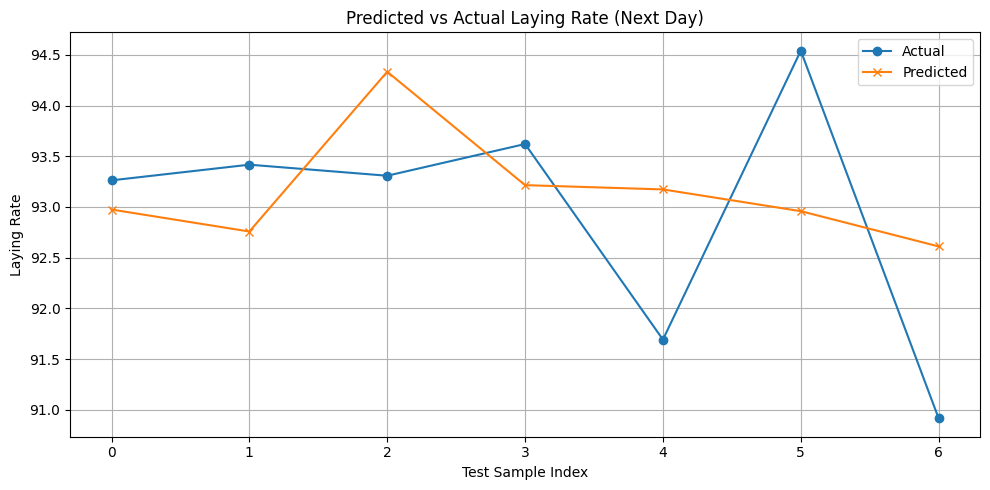

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(denorm_targets, label='Actual', marker='o')
plt.plot(denorm_preds, label='Predicted', marker='x')
plt.title('Predicted vs Actual Laying Rate (Next Day)')
plt.xlabel('Test Sample Index')
plt.ylabel('Laying Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


3.5 Saving Model

In [ ]:
torch.save(model, 'full_model.pt')

In [ ]:
from google.colab import files
files.download('best_model.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('full_model.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

def evaluate_metrics(model, test_loader, y_mean, y_std, device='cpu'):
    model.eval()
    model.to(device)

    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = [batch.to(device) for batch in inputs]
            targets = targets.to(device).float()

            preds = model(inputs).squeeze()
            all_preds.append(preds.cpu())
            all_targets.append(targets.cpu())

    preds = torch.cat(all_preds).numpy()
    targets = torch.cat(all_targets).numpy()
    preds_denorm = preds * y_std + y_mean
    targets_denorm = targets * y_std + y_mean
    mse = np.mean((preds_denorm - targets_denorm) ** 2)
    mae = np.mean(np.abs(preds_denorm - targets_denorm))
    rmse = np.sqrt(mse)

    print("\nFinal Test Evaluation:")
    print(f"MSE : {mse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

    return preds_denorm, targets_denorm


In [ ]:
y_mean = y_mean.item() if torch.is_tensor(y_mean) else y_mean
y_std = y_std.item() if torch.is_tensor(y_std) else y_std
preds_denorm = preds * y_std + y_mean
targets_denorm = targets * y_std + y_mean


In [ ]:
preds, targets = evaluate_metrics(model, test_loader, y_mean, y_std, device='cuda' if torch.cuda.is_available() else 'cpu')



Final Test Evaluation:
MSE : 1.61
MAE : 1.02
RMSE: 1.27


## Discussion(other architectures)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import softmax
from torch_geometric.loader import DataLoader

class ManualEdgeAttentionConv(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin_node = nn.Linear(in_channels, out_channels)
        self.lin_edge = nn.Linear(edge_dim, out_channels)
        self.att = nn.Parameter(torch.Tensor(1, out_channels))
        nn.init.xavier_uniform_(self.att.data)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin_node(x)
        edge_attr = self.lin_edge(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_i, x_j, edge_attr, index):
        msg = x_j + edge_attr
        alpha = (msg * self.att).sum(dim=-1)
        alpha = softmax(alpha, index)
        return msg * alpha.view(-1, 1)
class ManualEdgeGATRegressor(nn.Module):
    def __init__(self, in_channels, hidden_channels, edge_dim, dropout=0.3):
        super().__init__()
        self.gat1 = ManualEdgeAttentionConv(in_channels, hidden_channels, edge_dim)
        self.gat2 = ManualEdgeAttentionConv(hidden_channels, hidden_channels, edge_dim)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_channels, 1)

    def forward(self, x, edge_index, edge_attr):
        x = self.gat1(x, edge_index, edge_attr)
        x = F.elu(x)
        x = self.dropout(x)
        x = self.gat2(x, edge_index, edge_attr)
        x = F.elu(x)
        x = self.dropout(x)
        x = torch.mean(x, dim=0)
        return self.fc(x).squeeze()
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = float('inf')
        self.should_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.should_stop = True



In [ ]:
model = ManualEdgeGATRegressor(in_channels=2, hidden_channels=64, edge_dim=29, dropout=0.4)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5, verbose=True)
loss_fn = nn.MSELoss()
early_stopper = EarlyStopping(patience=5)


In [ ]:
train_losses = []
val_losses = []
best_model_state = None

for epoch in range(1, 101):
    model.train()
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()
        pred = model(batch.x, batch.edge_index, batch.edge_attr)
        loss = loss_fn(pred.view(-1), batch.y.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    with torch.no_grad():
        val_loss = avg_train_loss
        val_losses.append(val_loss)
        scheduler.step(val_loss)

        print(f"Epoch {epoch} | Train Loss: {avg_train_loss:.4f}")

        early_stopper(val_loss)
        if early_stopper.should_stop:
            print(f"⏹️ Early stopping triggered at epoch {epoch}")
            break


Epoch 1 | Train Loss: 283929.9573
Epoch 2 | Train Loss: 15175.6427
Epoch 3 | Train Loss: 9360.7269
Epoch 4 | Train Loss: 4676.7024
Epoch 5 | Train Loss: 3572.9568
Epoch 6 | Train Loss: 3511.7410
Epoch 7 | Train Loss: 3064.3173
Epoch 8 | Train Loss: 2675.4025
Epoch 9 | Train Loss: 4266.9311
Epoch 10 | Train Loss: 4489.3480
Epoch 11 | Train Loss: 2672.6517
Epoch 12 | Train Loss: 2445.5077
Epoch 13 | Train Loss: 3500.2514
Epoch 14 | Train Loss: 2724.8400
Epoch 15 | Train Loss: 4637.6947
Epoch 16 | Train Loss: 2394.4650
Epoch 17 | Train Loss: 2650.5339
Epoch 18 | Train Loss: 2226.7454
Epoch 19 | Train Loss: 2858.8867
Epoch 20 | Train Loss: 1892.5513
Epoch 21 | Train Loss: 3142.3605
Epoch 22 | Train Loss: 1730.7188
Epoch 23 | Train Loss: 2981.6690
Epoch 24 | Train Loss: 3748.1622
Epoch 25 | Train Loss: 770.3810
Epoch 26 | Train Loss: 2348.2322
Epoch 27 | Train Loss: 2657.8277
Epoch 28 | Train Loss: 1230.7036
Epoch 29 | Train Loss: 2554.6107
Epoch 30 | Train Loss: 1689.7455
⏹️ Early stopping

In [ ]:
model.eval()
preds, targets = [], []

with torch.no_grad():
    for batch in test_loader:
        pred = model(batch.x, batch.edge_index, batch.edge_attr)
        preds.append(pred.item())
        targets.append(batch.y.item())


In [ ]:
import torch
import numpy as np

mae = torch.mean(torch.abs(denorm_preds - denorm_targets)).item()
mae

1.017332911491394

In [ ]:
rmse = torch.sqrt(torch.mean((denorm_preds - denorm_targets) ** 2)).item()
rmse

1.151692271232605